In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import kid_readout.roach.heterodyne

In [4]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [5]:
import kid_readout.utils.sweeps

In [6]:
ri.set_fft_gain(4)
ri.set_lo(1030.)
ri.set_dac_atten(3)

In [7]:
512e6/2**15

15625.0

In [8]:
1e6/_

64.0

In [9]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-128,128)+1030,offsets=np.arange(-32,32)/64.,nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [38]:
n = 0
while True:
    tic = time.time()
    epoch = tic
    swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)
    print time.time() - tic
    tic = time.time()
    freq = swp.freqs
    data = swp.data
    print time.time() - tic
    fn = time.strftime("/data/detectors/%Y-%m-%d_%H%M%S_sweep.npz")
    np.savez(fn,freq=freq,data=data,epoch=epoch)
    print n, fn
    n += 1
    time.sleep(120)

detected mcnt overflow None 164109 0 65536 0 576 164109
detected mcnt overflow None 65920 0 65536 0 336 65920
detected mcnt overflow None 622963 0 65536 0 240 622963
detected mcnt overflow None 49509 0 65536 0 992 49509
detected mcnt overflow None 1016166 0 65536 0 256 1016166
detected mcnt overflow None 344408 0 65536 0 768 344408
271.556915045
19.4410860538
0 /data/detectors/2015-07-21_152732_sweep.npz
detected mcnt overflow None 246029 0 65536 0 128 246029
detected mcnt overflow None 491903 0 65536 0 256 491903
detected mcnt overflow None 901489 0 65536 0 304 901489
detected mcnt overflow None 98659 0 65536 0 288 98659
detected mcnt overflow None 754005 0 65536 0 544 754005
detected mcnt overflow None 524615 0 65536 0 368 524615
detected mcnt overflow None 557369 0 65536 0 560 557369
detected mcnt overflow None 344363 0 65536 0 560 344363
272.554828167
19.2011590004
1 /data/detectors/2015-07-21_153424_sweep.npz
detected mcnt overflow None 246139 0 65536 0 144 246139
detected mcnt ov

KeyboardInterrupt: 

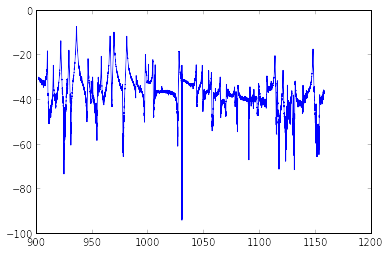

In [30]:
plot(swp.freqs,20*np.log10(np.abs(swp.data)))
#xlim(920,950)

In [27]:
fn = time.strftime("/data/detectors/%Y-%m-%d_%H%M%S_sweep.npz")

In [28]:
fn

'/data/detectors/2015-07-20_221724_sweep.npz'

In [10]:
import kid_readout.equipment.agilent_33220

In [11]:
fg = kid_readout.equipment.agilent_33220.FunctionGenerator(addr=('192.168.1.145', 5025))

In [12]:
fg.send_get('*IDN?')

'Agilent Technologies,33220A,MY44058488,2.07-2.06-22-2\n'

In [13]:
fg.set_pulse(2**22/512e6,64e-6,high_level=10.0)

waveform ready, remember to enable output


In [14]:
fg.enable_output(True)

In [15]:
import time

In [19]:
del swp

In [20]:
for lo in [830.,1030.,1230.,1430.,1630.,1830.,2030.]:
    print lo
    ri.set_lo(lo)
    swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32,reads_per_step=8)
    print "processing..."
    folds = []
    frqs= []
    for blk in swp.blocks:
        if (blk.tone % 128) in [127,1]:
            continue
        fold = blk.data.reshape((-1,256)).mean(0)
        frq = blk.fs*blk.tone*1.0/blk.nsamp
        if blk.tone > blk.nsamp/2:
            frq = frq-blk.fs
        frq = frq + lo
#        plot(frq,np.abs(fold).ptp(),'.')
        frqs.append(frq)
        folds.append(fold)
    np.savez(('/data/detectors/2015-07-25-lo-%.1f.npz' % lo),frqs=np.array(frqs),folds=np.vstack(folds),epoch=time.time())
    del swp

830.0
detected mcnt overflow None 803115 0 65536 0 3920 803115
detected mcnt overflow None 328043 0 65536 0 2528 328043
detected mcnt overflow None 704812 0 65536 0 1296 704812
detected mcnt overflow None 49436 0 65536 0 3728 49436
detected mcnt overflow None 82269 0 65536 0 2496 82269
detected mcnt overflow None 557341 0 65536 0 1136 557341
detected mcnt overflow None 770318 0 65536 0 3936 770318
detected mcnt overflow None 65870 0 65536 0 2672 65870
detected mcnt overflow None 131343 0 65536 0 1360 131343
detected mcnt overflow None 82240 0 65536 0 2864 82240
detected mcnt overflow None 983424 0 65536 0 1648 983424
detected mcnt overflow None 82240 0 65536 0 176 82240
detected mcnt overflow None 819505 0 65536 0 3072 819505
detected mcnt overflow None 131441 0 65536 0 1728 131441
detected mcnt overflow None 262450 0 65536 0 336 262450
detected mcnt overflow None 180515 0 65536 0 3264 180515
detected mcnt overflow None 573795 0 65536 0 1920 573795
detected mcnt overflow None 934179 0 

In [61]:
#fg.set_pulse(512e6/2**22,64e-6,high_level=10.0)
fg.set_square_wave(512e6/2**22,high_level=10.0)
time.sleep(2)
fg.enable_output(True)
time.sleep(2)
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32,reads_per_step=8)
fg.enable_output(False)

waveform ready, remember to enable output.
detected mcnt overflow None 819515 0 65536 0 3184 819515
detected mcnt overflow None 295291 0 65536 0 1744 295291
detected mcnt overflow None 316 0 65536 0 576 316
detected mcnt overflow None 180524 0 65536 0 3472 180524
detected mcnt overflow None 721261 0 65536 0 2112 721261
detected mcnt overflow None 737581 0 65536 0 848 737581
detected mcnt overflow None 917790 0 65536 0 3632 917790
detected mcnt overflow None 311646 0 65536 0 2448 311646
detected mcnt overflow None 180511 0 65536 0 1168 180511
detected mcnt overflow None 524559 0 65536 0 3936 524559
detected mcnt overflow None 819536 0 65536 0 2672 819536
detected mcnt overflow None 524560 0 65536 0 1408 524560
detected mcnt overflow None 524624 0 65536 0 16 524624
detected mcnt overflow None 737601 0 65536 0 2768 737601
detected mcnt overflow None 360834 0 65536 0 1440 360834
detected mcnt overflow None 147778 0 65536 0 16 147778
detected mcnt overflow None 868659 0 65536 0 3104 868659


In [62]:
blk = swp.blocks[0]

In [66]:
512e6*blk.tone/blk.nsamp

383500000.0

In [180]:
12*blk.nsamp/512.

768.0

In [174]:
1536/32.

48.0

In [187]:
blk = [blk for blk in swp.blocks if blk.tone==4*768+1][0]

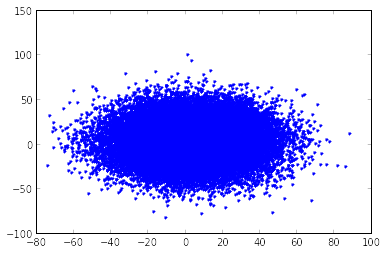

In [188]:
plot(blk.data.real,blk.data.imag,'.')

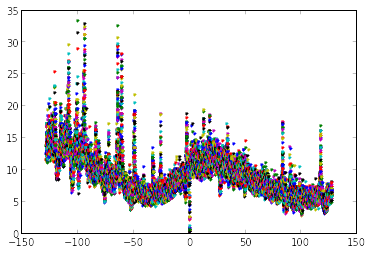

In [214]:
folds = []
frqs= []
for blk in swp.blocks:
    if (blk.tone % 128) in [127,1]:
        continue
    fold = blk.data.reshape((-1,256)).mean(0)
    frq = blk.fs*blk.tone*1.0/blk.nsamp
    if blk.tone > blk.nsamp/2:
        frq = frq-blk.fs
    plot(frq,np.abs(fold).ptp(),'.')
    frqs.append(frq)
    folds.append(fold)

In [215]:
folds = np.vstack(folds)
frqs = np.array(frqs)

In [248]:
np.savez('/data/detectors/2015-07-21-dense-led-response-spectrum.npz',frqs=frqs,folds=folds,lo=1030)

In [191]:
folds.shape

(16297, 256)

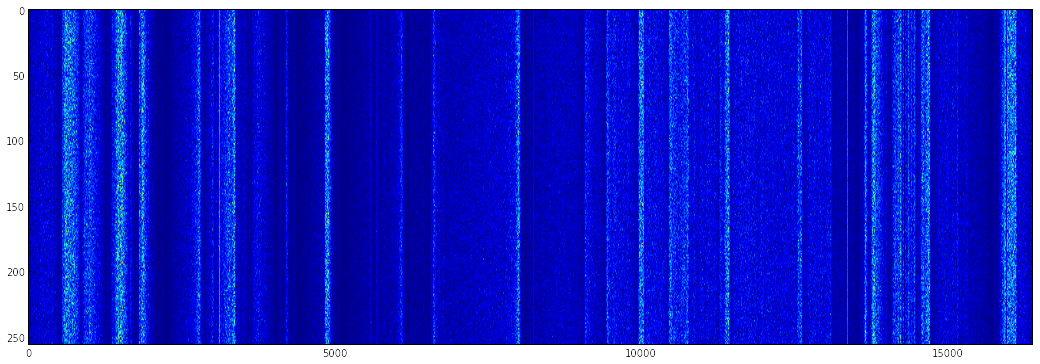

In [86]:
figure(figsize=(18,6))
imshow((np.abs(folds-folds.mean(1)[:,None])/np.abs(folds).mean(1)[:,None]).real.T,aspect='auto')
#clim(0.9,1.1)

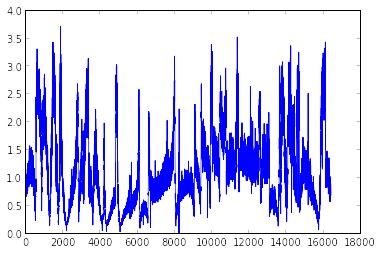

In [81]:
plot(np.abs(folds).ptp(1)/np.abs(folds).mean(1))

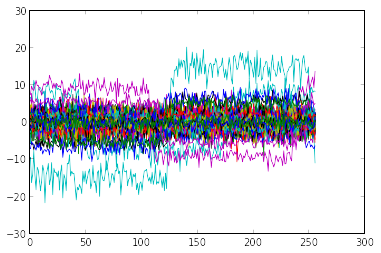

In [103]:
blah =plot(foldm[::128,:].T.imag)

In [216]:
foldm = (folds - folds.mean(1)[:,None])

In [156]:
frqs[::32] = np.nan
frqs[2::32] = np.nan
frqs[30::32] = np.nan
foldm2 = foldm[np.isfinite(frqs),:]


In [158]:
frqs = frqs[np.isfinite(frqs)]

In [157]:
foldm2.shape

(14848, 256)

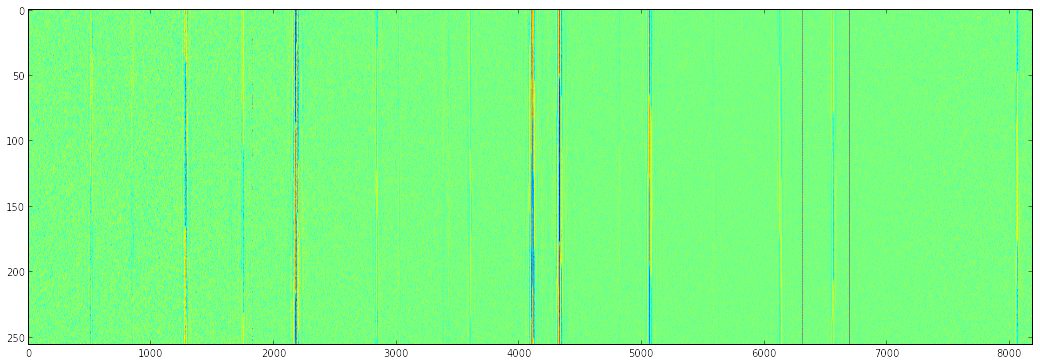

In [105]:
figure(figsize=(18,6))
imshow(foldm[:8192,:].T.real,aspect='auto')
#clim(-10,10)

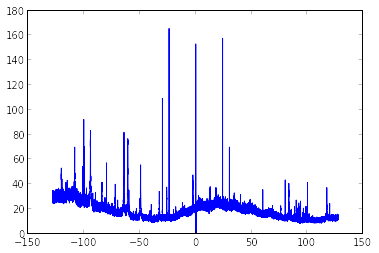

In [160]:
plot(frqs,foldm2.real.ptp(1)+foldm2.imag.ptp(1))
#xlim(400,600)
#xlim(-100,-90)

In [115]:
def find_resonators(freqs,data,max_res=50,min_spacing=0.5):
    order = np.argsort(data)
    resonators = np.zeros((max_res,))
    next_index = 0
    for k,this_freq in enumerate(freqs[order]):
        if np.abs(resonators-this_freq).min() >= min_spacing:
            print "found one",next_index,this_freq
            resonators[next_index] = this_freq
            next_index +=1
            if next_index >= max_res:
                break
    return resonators

In [239]:
rs = find_resonators(frqs,(foldm.real.ptp(1)+foldm.imag.ptp(1))/foldm.std(1),max_res=32,min_spacing=2.)

found one 0 -60.96875
found one 1 -49.5
found one 2 -64.328125
found one 3 -94.375
found one 4 83.3125
found one 5 -26.03125
found one 6 117.34375
found one 7 -32.75
found one 8 -2.6875
found one 9 -108.5
found one 10 -72.25
found one 11 -101.28125
found one 12 -84.1875
found one 13 90.515625
found one 14 12.828125
found one 15 -120.5625
found one 16 76.09375
found one 17 -41.125
found one 18 -53.3125
found one 19 85.4375
found one 20 -81.375
found one 21 18.15625
found one 22 -23.921875
found one 23 -115.25
found one 24 101.453125
found one 25 34.3125
found one 26 98.59375
found one 27 23.921875
found one 28 -29.921875
found one 29 108.515625
found one 30 94.5
found one 31 110.65625


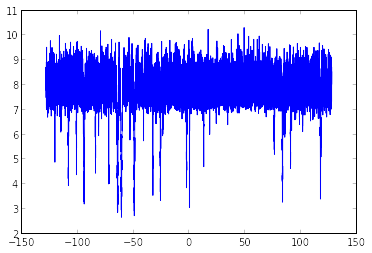

In [240]:
plot(frqs,(foldm.real.ptp(1)+foldm.imag.ptp(1))/foldm.std(1))
ax = gca()
#for k in rs:
#    ax.axvline(k)

In [241]:
np.mod(np.abs(rs[2]),6)

4.328125

In [242]:
plt.close('all')

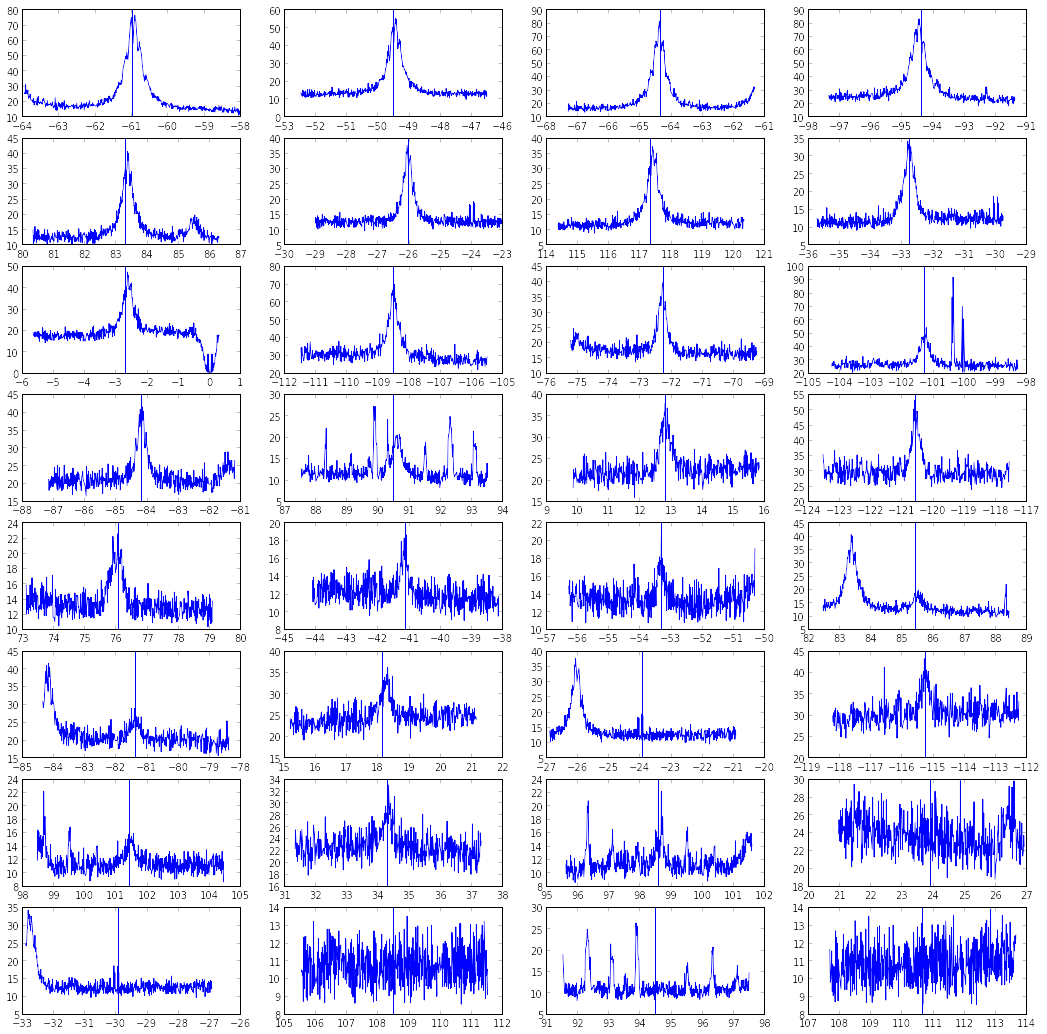

In [244]:
fig,axs = subplots(8,4,figsize=(18,18))
for k in range(32):
    f0 = rs[k]
#    if np.abs(np.mod(f0,6)) <0.1:
#        continue
    mask = np.abs(frqs-f0) < 3
    ax = axs.flatten()[k]
    ax.plot(frqs[mask],(foldm.real.ptp(1)+foldm.imag.ptp(1))[mask])
    ax.axvline(f0)

In [220]:
np.argmin(np.abs(frqs+101.5))

1700

In [198]:
frqs[6652]

-24.0

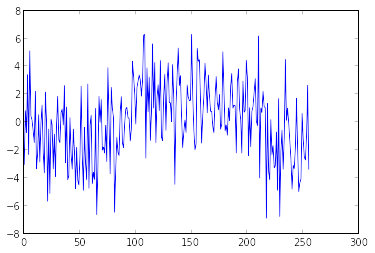

In [231]:
plot(foldm[1689,:].imag)

In [246]:
fr= 1030-rs
fr.sort()

In [247]:
fr

array([  912.65625 ,   919.34375 ,   921.484375,   928.546875,
         931.40625 ,   935.5     ,   939.484375,   944.5625  ,
         946.6875  ,   953.90625 ,   995.6875  ,  1006.078125,
        1011.84375 ,  1017.171875,  1032.6875  ,  1053.921875,
        1056.03125 ,  1059.921875,  1062.75    ,  1071.125   ,
        1079.5     ,  1083.3125  ,  1090.96875 ,  1094.328125,
        1102.25    ,  1111.375   ,  1114.1875  ,  1124.375   ,
        1131.28125 ,  1138.5     ,  1145.25    ,  1150.5625  ])

In [249]:
np.save('/home/gjones/2015-07-21-dense-resonances-1030.npy',fr)

In [202]:
blk = swp.blocks[6689]

In [213]:
blk.tone % 128

1

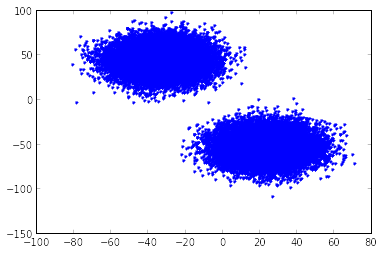

In [204]:
plot(blk.data.real,blk.data.imag,'.')

In [46]:
d.shape

(262144, 32)

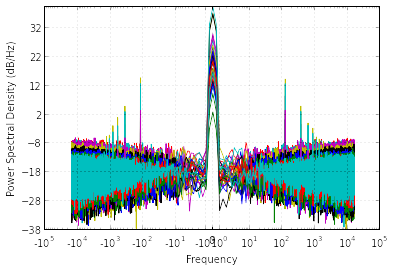

In [55]:
for k in range(32):
    blah = psd(d[:,k],Fs=512e6/2**14,NFFT=2**16)
xscale('symlog')

In [57]:
fold = d.reshape((-1,256,32))

In [58]:
fold.shape

(1024, 256, 32)

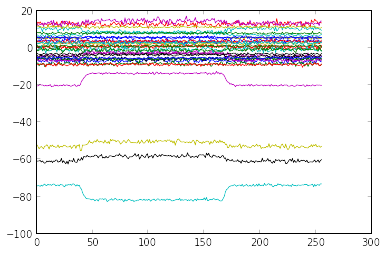

In [60]:
plot(fold.mean(0).imag)

In [42]:
d.shape

(32768, 32)

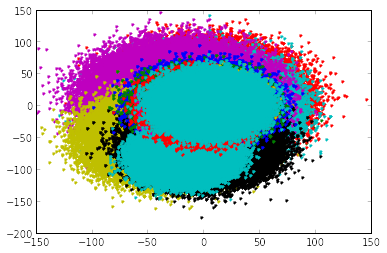

In [56]:
plot(d.real,d.imag,'.')